In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] =10,6


In [69]:
dataset = pd.read_excel('ImportExportData.xlsx',sheet_name='Sheet2')
ied = dataset
print(dataset)
locationAmnth =dataset.iloc[:, :]

print(locationAmnth)

locationAmnth['Month'] = pd.to_datetime(locationAmnth['Month'], infer_datetime_format=True)
indexedDataset = locationAmnth.set_index(['Month'])

        Month  Export
0  2018-01-01      14
1  2018-02-01      27
2  2018-03-01     118
3  2018-04-01      99
4  2018-05-01     128
5  2018-06-01     312
6  2018-07-01     418
7  2018-08-01     370
8  2018-09-01     328
9  2018-10-01     392
10 2018-11-01     351
11 2018-12-01     356
12 2019-01-01     366
13 2019-02-01     255
14 2019-03-01     438
15 2019-04-01     339
16 2019-05-01     224
17 2019-06-01     459
18 2019-07-01     415
19 2019-08-01     225
20 2019-09-01     222
21 2019-10-01     331
22 2019-11-01     288
23 2019-12-01     273
        Month  Export
0  2018-01-01      14
1  2018-02-01      27
2  2018-03-01     118
3  2018-04-01      99
4  2018-05-01     128
5  2018-06-01     312
6  2018-07-01     418
7  2018-08-01     370
8  2018-09-01     328
9  2018-10-01     392
10 2018-11-01     351
11 2018-12-01     356
12 2019-01-01     366
13 2019-02-01     255
14 2019-03-01     438
15 2019-04-01     339
16 2019-05-01     224
17 2019-06-01     459
18 2019-07-01     415
19 2019-08

In [70]:
from datetime import datetime
indexedDataset.tail(5)

,Export
Month,
2019-08-01,225
2019-09-01,222
2019-10-01,331
2019-11-01,288
2019-12-01,273


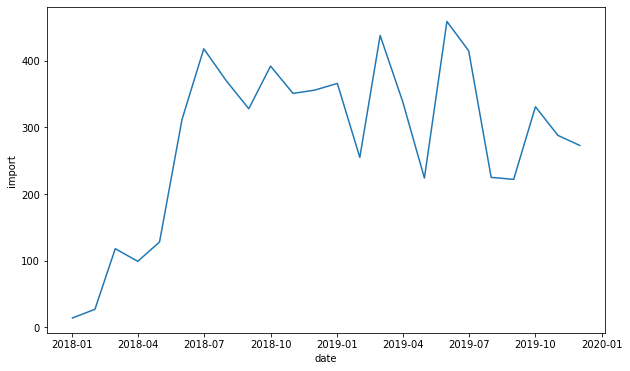

In [71]:
plt.xlabel('date')
plt.ylabel('import')
plt.plot(indexedDataset)

In [72]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                Export
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  242.750000
2019-01-01  272.083333
2019-02-01  291.083333
2019-03-01  317.750000
2019-04-01  337.750000
2019-05-01  345.750000
2019-06-01  358.000000
2019-07-01  357.750000
2019-08-01  345.666667
2019-09-01  336.833333
2019-10-01  331.750000
2019-11-01  326.500000
2019-12-01  319.583333                 Export
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  151.973757
2019-01-01  137.045088
2019-02-01  113.813610
2019-03-01  106.848342
2019-04-01 

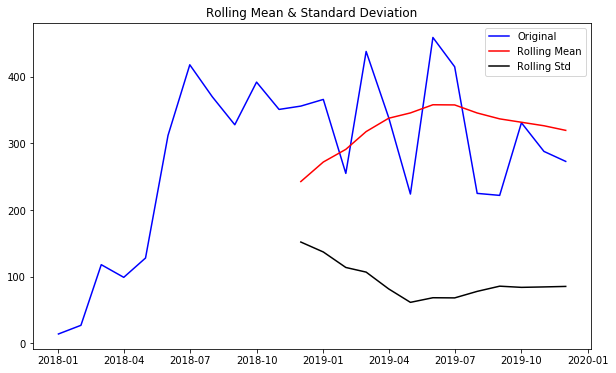

In [73]:
#plot rollling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [74]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Export'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

print(indexedDataset)

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
            Export
Month             
2018-01-01      14
2018-02-01      27
2018-03-01     118
2018-04-01      99
2018-05-01     128
2018-06-01     312
2018-07-01     418
2018-08-01     370
2018-09-01     328
2018-10-01     392
2018-11-01     351
2018-12-01     356
2019-01-01     366
2019-02-01     255
2019-03-01     438
2019-04-01     339
2019-05-01     224
2019-06-01     459
2019-07-01     415
2019-08-01     225
2019-09-01     222
2019-10-01     331
2019-11-01     288
2019-12-01     273


            Export
Month             
2018-01-01      14
2018-02-01      27
2018-03-01     118
2018-04-01      99
2018-05-01     128
2018-06-01     312
2018-07-01     418
2018-08-01     370
2018-09-01     328
2018-10-01     392
2018-11-01     351
2018-12-01     356
2019-01-01     366
2019-02-01     255
2019-03-01     438
2019-04-01     339
2019-05-01     224
2019-06-01     459
2019-07-01     415
2019-08-01     225
2019-09-01     222
2019-10-01     331
2019-11-01     288
2019-12-01     273


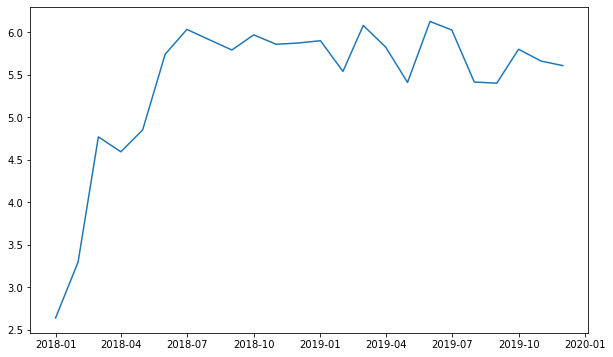

In [75]:
#Estimating Trend
print(indexedDataset)
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


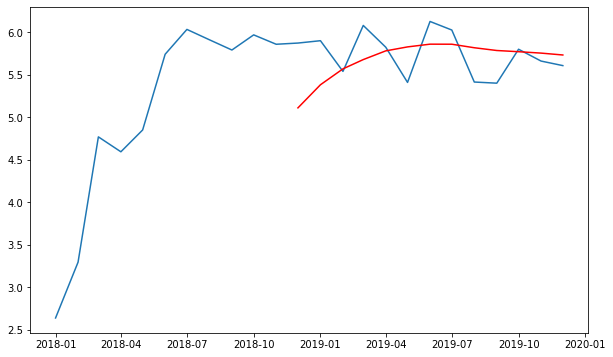

In [76]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#time series still not stationary

In [77]:
datasetlogScaleandMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleandMovingAverage.head(12)

datasetlogScaleandMovingAverage.dropna(inplace=True)
datasetlogScaleandMovingAverage.head(10)

,Export
Month,
2018-12-01,0.762872
2019-01-01,0.518610
2019-02-01,-0.029879
2019-03-01,0.401782
2019-04-01,0.042990
2019-05-01,-0.417999
2019-06-01,0.267234
2019-07-01,0.167063
2019-08-01,-0.403665


In [78]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

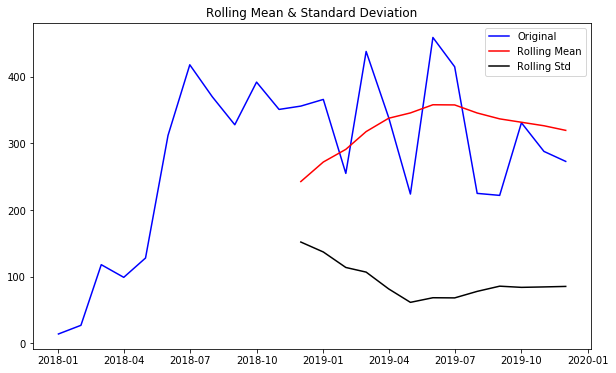

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [79]:
test_stationarity(datasetlogScaleandMovingAverage)

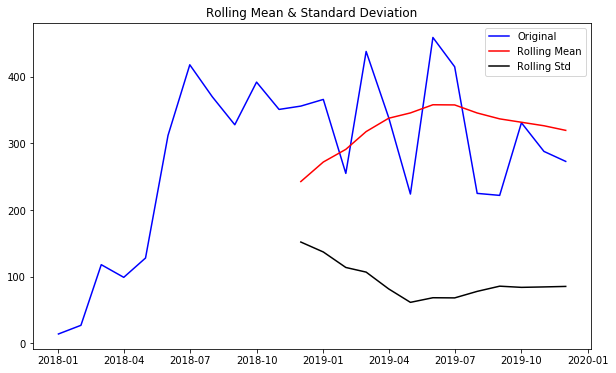

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [80]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
test_stationarity(datasetlogScaleandMovingAverage)    

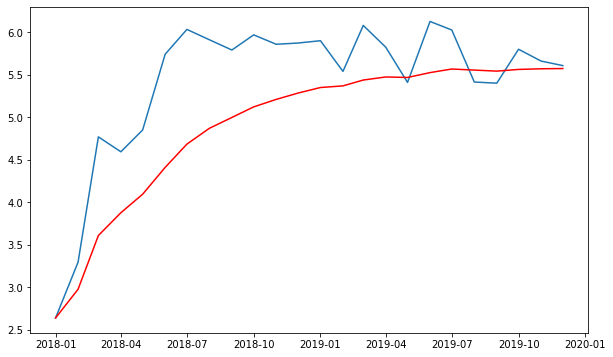

In [81]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

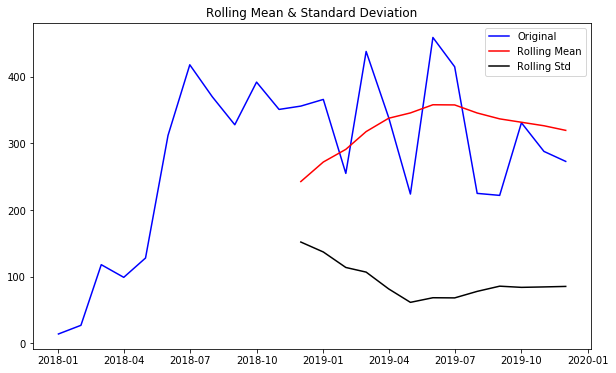

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [82]:
datasetlogScaleandMovingexponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleandMovingexponentialDecayAverage)

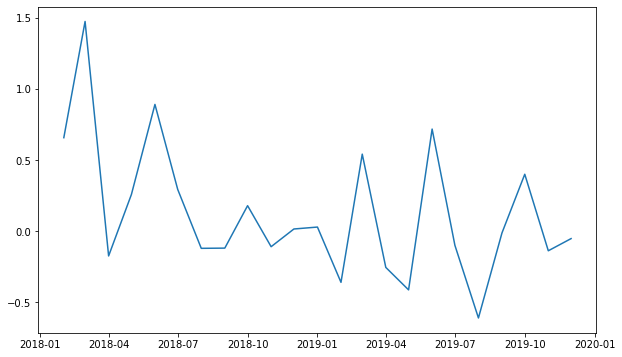

In [83]:
datasetlogOffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogOffShifting)

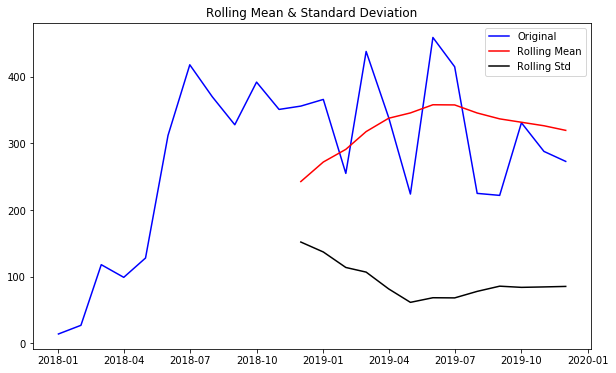

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [84]:
datasetlogOffShifting.dropna(inplace=True)
test_stationarity(datasetlogOffShifting)

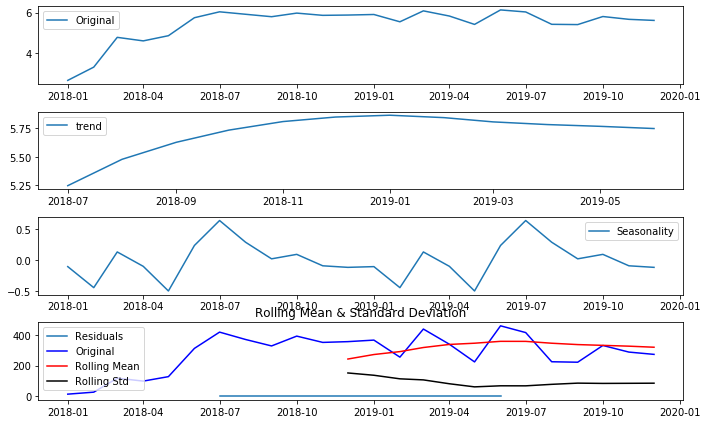

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [85]:
#components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

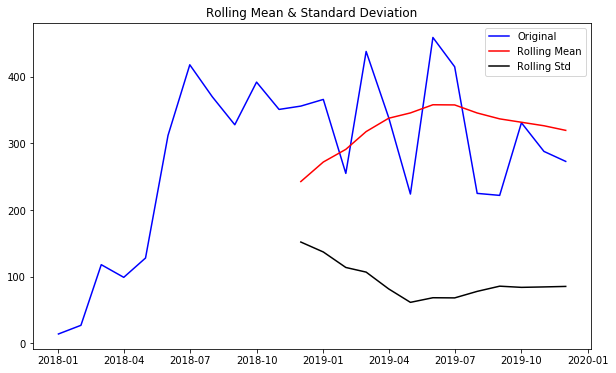

Results of Dickey Fuller Test:
Test Statistics                -2.630253
p-value                         0.086904
#Lags Used                      2.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [86]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


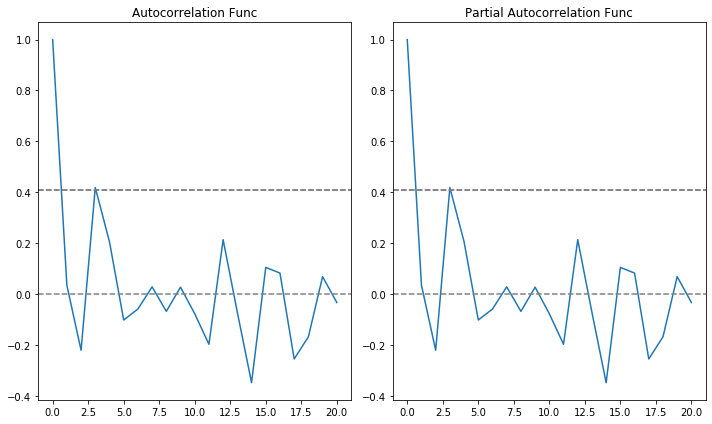

In [87]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogOffShifting, nlags=20)
lag_pacf = pacf(datasetlogOffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Func')

#Plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Func')
plt.tight_layout()
                          
                          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


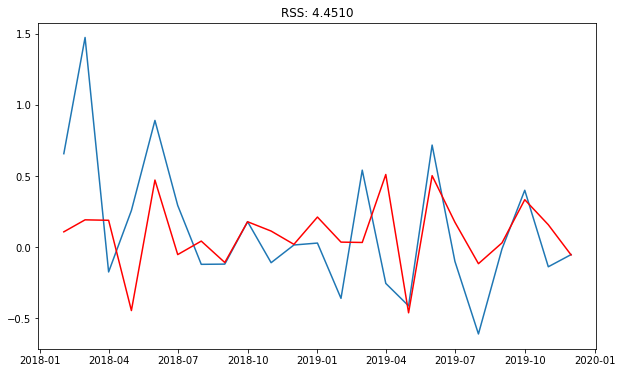

In [88]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


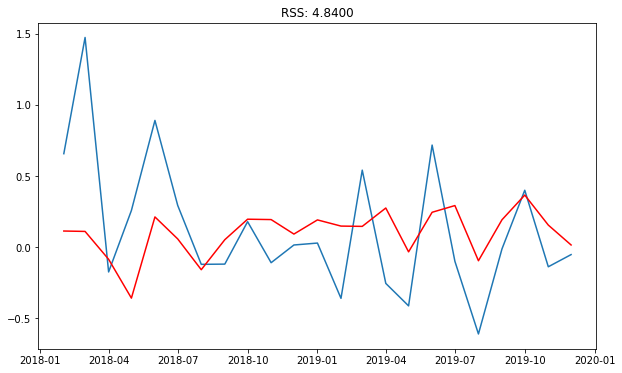

In [89]:
#MA MODEL
model=ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: 4.3929')

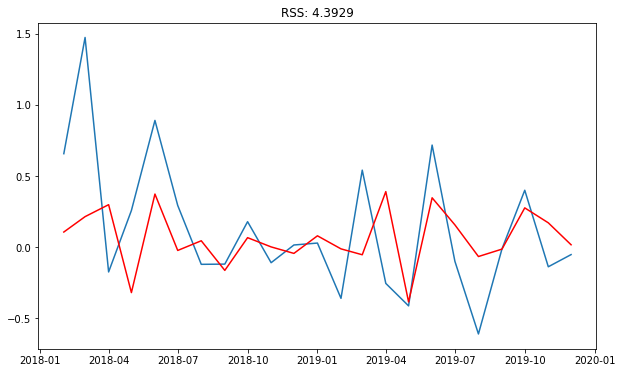

In [90]:
model=ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogOffShifting['Export'])**2))


In [91]:
pridictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pridictions_ARIMA_diff.head())

Month
2018-02-01    0.105381
2018-03-01    0.213684
2018-04-01    0.297816
2018-05-01   -0.320928
2018-06-01    0.372627
dtype: float64


In [92]:
#Convert to Cummulative Sum
pridictions_ARIMA_diff_cumsum = pridictions_ARIMA_diff.cumsum()
print(pridictions_ARIMA_diff_cumsum.head())

Month
2018-02-01    0.105381
2018-03-01    0.319065
2018-04-01    0.616881
2018-05-01    0.295953
2018-06-01    0.668580
dtype: float64


In [93]:
pridictions_ARIMA_log = pd.Series(indexedDataset_logScale['Export'].ix[0], index= indexedDataset_logScale.index)
pridictions_ARIMA_log = pridictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum, fill_value=0)
pridictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-01-01    2.639057
2018-02-01    2.744438
2018-03-01    2.958122
2018-04-01    3.255938
2018-05-01    2.935010
dtype: float64

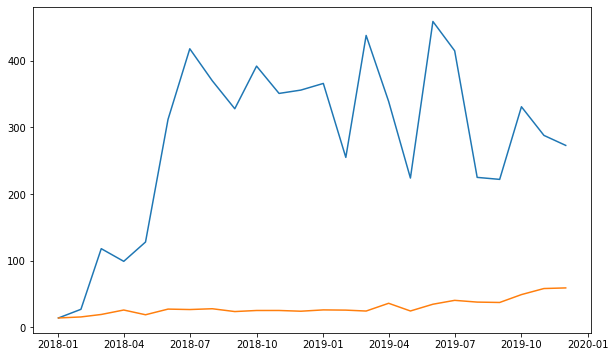

In [94]:
pridictions_ARIMA = np.exp(pridictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(pridictions_ARIMA)

In [95]:
indexedDataset_logScale

,Export
Month,
2018-01-01,2.639057
2018-02-01,3.295837
2018-03-01,4.770685
2018-04-01,4.595120
2018-05-01,4.852030
2018-06-01,5.743003
2018-07-01,6.035481
2018-08-01,5.913503
2018-09-01,5.793014


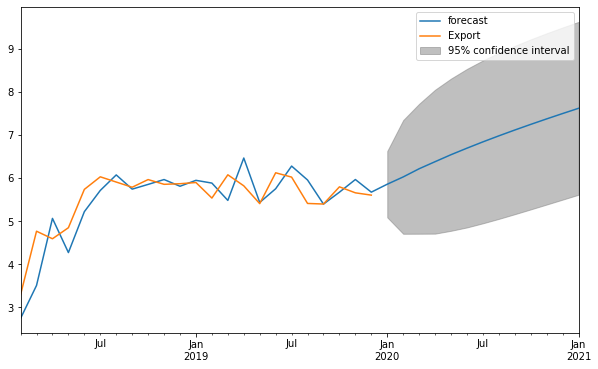

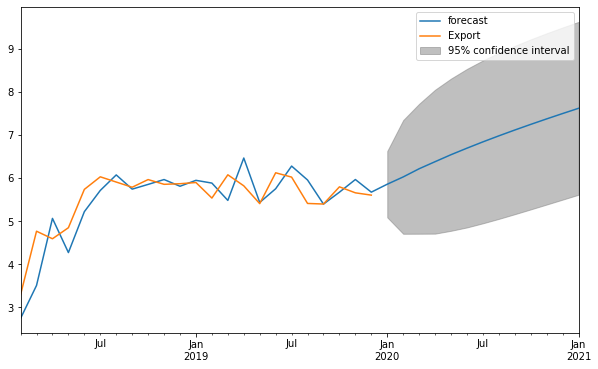

In [96]:
results_ARIMA.plot_predict(1,36)



In [97]:
results_ARIMA.forecast(steps=12)

(array([5.86353714, 6.03266075, 6.2228021 , 6.38708222, 6.54964525,
        6.70114638, 6.84761237, 6.98765729, 7.12315743, 7.25429317,
        7.38188898, 7.50634121]),
 array([0.39328214, 0.67433541, 0.77069271, 0.85344261, 0.90262709,
        0.94007751, 0.96576001, 0.98474333, 0.9983807 , 1.00841309,
        1.01574131, 1.02113704]),
 array([[5.09271831, 6.63435596],
        [4.71098763, 7.35433388],
        [4.71227213, 7.73333206],
        [4.71436544, 8.05979901],
        [4.78052866, 8.31876185],
        [4.85862831, 8.54366444],
        [4.95475752, 8.74046721],
        [5.05759584, 8.91771875],
        [5.16636722, 9.07994765],
        [5.27783982, 9.23074651],
        [5.3910726 , 9.37270536],
        [5.50494938, 9.50773303]]))

In [98]:
x=results_ARIMA.forecast(steps=12)
print(x[0])


[5.86353714 6.03266075 6.2228021  6.38708222 6.54964525 6.70114638
 6.84761237 6.98765729 7.12315743 7.25429317 7.38188898 7.50634121]


In [99]:
print(np.exp(x[0]))

[ 351.96689952  416.82261715  504.11382976  594.12053581  698.99616419
  813.33768173  941.62995344 1083.180927   1240.36061297 1414.16307472
 1606.62178366 1819.54401851]
